# Predicting the salary for a data science job

### Project Overview
- Created a model that estimates the salary for a job in data (data science,data analysis,MLE, etc)
- Exploratory analysis of the data to find patterns and get insights
- Visualisation of the said patterns and insights
- Tested on Linear, Lasso and Random Forest Regressor. Used GridSearchCV to optimize our best model

### Steps
- Importing the data
- Data Cleaning
- EDA
- Modelling
- Conclusion

In [1]:
# Importing all the required libraries
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_columns', None)

The data and inspiration for this project came from the following github project from Ken Jee
https://github.com/PlayingNumbers/ds_salary_proj/tree/master

In [2]:
# Loading the data from my local system
df = pd.read_csv(r'C:\Users\wasiw\Python Files\My Projects\Data Science Salaries\glassdoor_jobs.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
# Some salary entries have been entered in per hour units whereas most of the dataset is in per annum units
# Therefore we will clean up the Salary estimate column and convert all salaries to per annum units 
# The salaries at the moment are of string datatype

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

# Removing the values where the salary esimtate has negative 1 value as its a wrong entry
df = df[df['Salary Estimate'] != '-1']

In [5]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


In [6]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
minus_df = pd.DataFrame(minus_Kd)
minus_df.head(3)

,Salary Estimate
0,53-91
1,63-112
2,80-90


In [7]:
minus_df['per hour'] = minus_df['Salary Estimate'].apply(lambda x:1 if 'per hour' in x.lower() else 0)
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
min_hr = pd.DataFrame(min_hr)
min_hr['per hour'] = minus_df['per hour']
min_hr.head()

,Salary Estimate,per hour
0,53-91,0
1,63-112,0
2,80-90,0
3,56-97,0
4,86-143,0


In [8]:
# Separating the estimated salaries into 2 different columns, also adding an average salary column

min_hr[['min_salary', 'max_salary']] = min_hr['Salary Estimate'].str.split('-', expand=True)
min_hr['min_salary'] = pd.to_numeric(min_hr['min_salary'])
min_hr['max_salary'] = pd.to_numeric(min_hr['max_salary'])

min_hr.head()
# df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
# df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
# df['avg_salary'] = (df.min_salary+df.max_salary)/2

,Salary Estimate,per hour,min_salary,max_salary
0,53-91,0,53,91
1,63-112,0,63,112
2,80-90,0,80,90
3,56-97,0,56,97
4,86-143,0,86,143


In [9]:
# Taking a look at the salaries which are per hour
min_hr[min_hr['per hour'] == 1]

,Salary Estimate,per hour,min_salary,max_salary
197,17-24,1,17,24
209,21-34,1,21,34
240,18-25,1,18,25
247,21-34,1,21,34
257,15-25,1,15,25
307,17-24,1,17,24
337,21-34,1,21,34
427,18-25,1,18,25
437,24-39,1,24,39
456,21-34,1,21,34


To scale the per hour values into per annum values we multiply by 40 X 50 (40 hours per week X 45  weeks per year, assuming full time hours and a 5 week holiday period wth no pay since it is a per
hour position. Then we divide it by 1000 to be consistent with the unit scale of the min_salary and max_salary columns)

In [10]:
min_hr['min_salary'] = min_hr.apply(lambda row: round(row['min_salary'] * 40 * 45 / 1000) if row['per hour'] == 1 else row['min_salary'], axis=1)
min_hr['max_salary'] = min_hr.apply(lambda row: round(row['max_salary'] * 40 * 45 / 1000) if row['per hour'] == 1 else row['min_salary'], axis=1)

# New scaled salary values
min_hr[min_hr['per hour'] == 1]

,Salary Estimate,per hour,min_salary,max_salary
197,17-24,1,31,43
209,21-34,1,38,61
240,18-25,1,32,45
247,21-34,1,38,61
257,15-25,1,27,45
307,17-24,1,31,43
337,21-34,1,38,61
427,18-25,1,32,45
437,24-39,1,43,70
456,21-34,1,38,61


In [11]:
# Addinf these new columns to our original dataframe

df['min_salary'] = min_hr['min_salary']
df['max_salary'] = min_hr['max_salary']
df['avg_salary'] = (df.min_salary+df.max_salary)/2
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,80,80.0


In [12]:
# Fixing up the Company name 
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4], axis = 1)
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0,Tecolote Research
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0,University of Maryland Medical System
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,80,80.0,KnowBe4


In [13]:
# Adding a column for states
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.job_state.value_counts().head(5)

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
Name: job_state, dtype: int64

In [14]:
# Checking if the Headquarters are in the same state

df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

In [15]:
df['same_state'].value_counts()

1    414
0    328
Name: same_state, dtype: int64

In [16]:
# Adding a column to see how old the company is
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2023 - x)
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0,Tecolote Research,NM,0,50
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0,University of Maryland Medical System,MD,0,39


In [17]:
# Next up we are going to parse the job description column, first we will take a look at the data
# contained in these entries
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

As expected job descriptions are lenghty text paragraphs which display what the company is looking for from their prospective employees.


We will go through these texts and look at keywords to find out generalistic job requirements. We will look at whether the job requires or does not required softwares like Python, R and Spark. Does it mention ai or aws or does it not.

In [18]:
#parsing of job description (python, etc.)

#python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if ' R ' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#AI
df['ai'] = df['Job Description'].apply(lambda x: 1 if 'artificial intelligence' in x.lower() else 0)


In [19]:
# Taking a look at our findings
print(df.python_yn.value_counts())
print(df.R_yn.value_counts())
print(df.spark.value_counts())
print(df.aws.value_counts())
print(df.ai.value_counts())

1    392
0    350
Name: python_yn, dtype: int64
0    741
1      1
Name: R_yn, dtype: int64
0    575
1    167
Name: spark, dtype: int64
0    566
1    176
Name: aws, dtype: int64
0    681
1     61
Name: ai, dtype: int64


Python seems to be the most popular software requirement whereas these companies dont seem to care too much about R-studio.

Spark and AWS seem to be quite popular as well

In [20]:
# Taking a look at the size of the companies
print(df['Size'].value_counts())

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64


In [21]:
# 9 unknown values
size_con = ((df['Size']=="Unknown"))
df[size_con]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,ai
48,48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,1,150,150,150.0,BPA Services,DC,0,-1,0,0,0,1,0
472,472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,100,100.0,Kronos Bio,MA,0,-1,0,0,0,0,0
477,477,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,1,150,150,150.0,BPA Services,DC,0,-1,0,0,0,1,0
518,518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,110,110,110.0,Kronos Bio,MA,0,-1,0,0,0,0,0
583,583,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,81,81,81.0,ALIN,NY,0,-1,1,0,0,0,0
703,703,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,100,100.0,Kronos Bio,MA,0,-1,0,0,0,0,0
778,778,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,110,110,110.0,Kronos Bio,MA,0,-1,0,0,0,0,0
819,819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,120,120,120.0,Kronos Bio,MA,0,-1,0,0,0,0,0
943,943,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,1,100,100,100.0,Kronos Bio,MA,0,-1,0,0,0,0,0


In [22]:
# The data for these companies is quite dodgy so we'll drop these columns

# We use the double print statements to make sure we accidentally dont end up deleting large chunks of data

print(len(df))
df = df[~size_con]
df = df[~(df['Size']=="-1")]
print(len(df))

742
732


In [23]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,ai
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0,Tecolote Research,NM,0,50,1,0,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0,University of Maryland Medical System,MD,0,39,1,0,0,0,0


In [24]:
# Stripping down the size column. Removing the unwanted information
size = pd.DataFrame(df['Size'])
size['size_n'] = size['Size'].str.extract(r'(.*?) e')
df['company size'] = size['size_n']
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,ai,company size
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0,Tecolote Research,NM,0,50,1,0,0,0,1,501 to 1000
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0,University of Maryland Medical System,MD,0,39,1,0,0,0,0,10000+
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,80,80.0,KnowBe4,FL,1,13,1,0,1,0,0,501 to 1000


In [25]:
# Dropping the unnamed column as its of no use to us
df = df.drop(['Unnamed: 0'], axis =1)

In [26]:
# Creating a function to simplify the Job Title into 7 distinct categories

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    

In [27]:
# Writing a function to determine whether the job posted is for a senio role, junior role, or not mentioned

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [28]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,ai,company size,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,53,53.0,Tecolote Research,NM,0,50,1,0,0,0,1,501 to 1000,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,63,63.0,University of Maryland Medical System,MD,0,39,1,0,0,0,0,10000+,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,80,80.0,KnowBe4,FL,1,13,1,0,1,0,0,501 to 1000,data scientist,na


In [29]:
print(df['job_simp'].value_counts())
print(df['seniority'].value_counts())

data scientist    276
na                177
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64
na        513
senior    217
jr          2
Name: seniority, dtype: int64


In [30]:
df['job_state'].value_counts()

 CA             151
 MA              96
 NY              71
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 WI              10
 IN              10
 UT              10
 MO               9
 DC               9
 AZ               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [31]:
# We have one wrong entry in the state column as Los Angeles is a city in the state of California
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [32]:
# Finding out the Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len'].sort_values(ascending=False).head(10)

319    10051
202    10051
257     9322
46      9120
509     9120
498     8761
749     8761
526     8734
789     8734
75      8397
Name: desc_len, dtype: int64

In [33]:
# Finding out the number of competitors that company has in the industry
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
# df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp'].value_counts()

0    450
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'ai', 'company size', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

## EDA
- We'll plot some histograms, bar charts and box plots to gather trends and get some insights from our dataset
- We'll also look at some pivot tables


Text(0.5, 1.0, 'Estimated salary graph \n mean = 74')

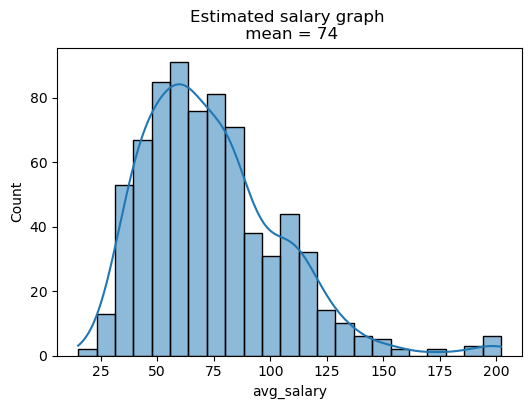

In [35]:
# Salary graph looks like a normal distribution
fig,ax = plt.subplots(figsize=(6,4))
sns.histplot(df['avg_salary'], kde=True)
plt.title(f'Estimated salary graph \n mean = {round(df["avg_salary"].mean())}')

Text(0.5, 1.0, 'Estimated salary graph for Data Scientists\n mean = 89k')

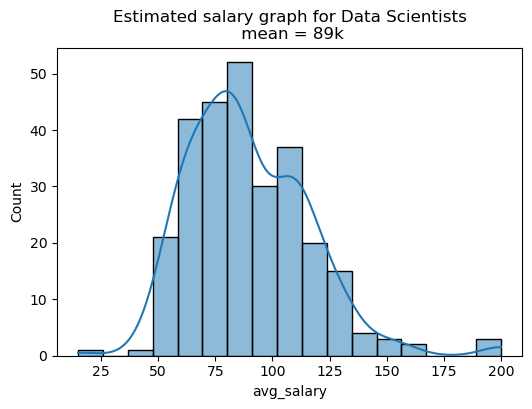

In [204]:
# Salary graph for data scientists specifically
fig,ax = plt.subplots(figsize=(6,4))

sns.histplot(df[df['job_simp']=="data scientist"]['avg_salary'], kde=True, )
plt.title(f'Estimated salary graph for Data Scientists\n mean = {round(df[df["job_simp"]=="data scientist"]["avg_salary"].mean())}k')

We can already see the average salary for a data scientist is much higher than in general for a data related job

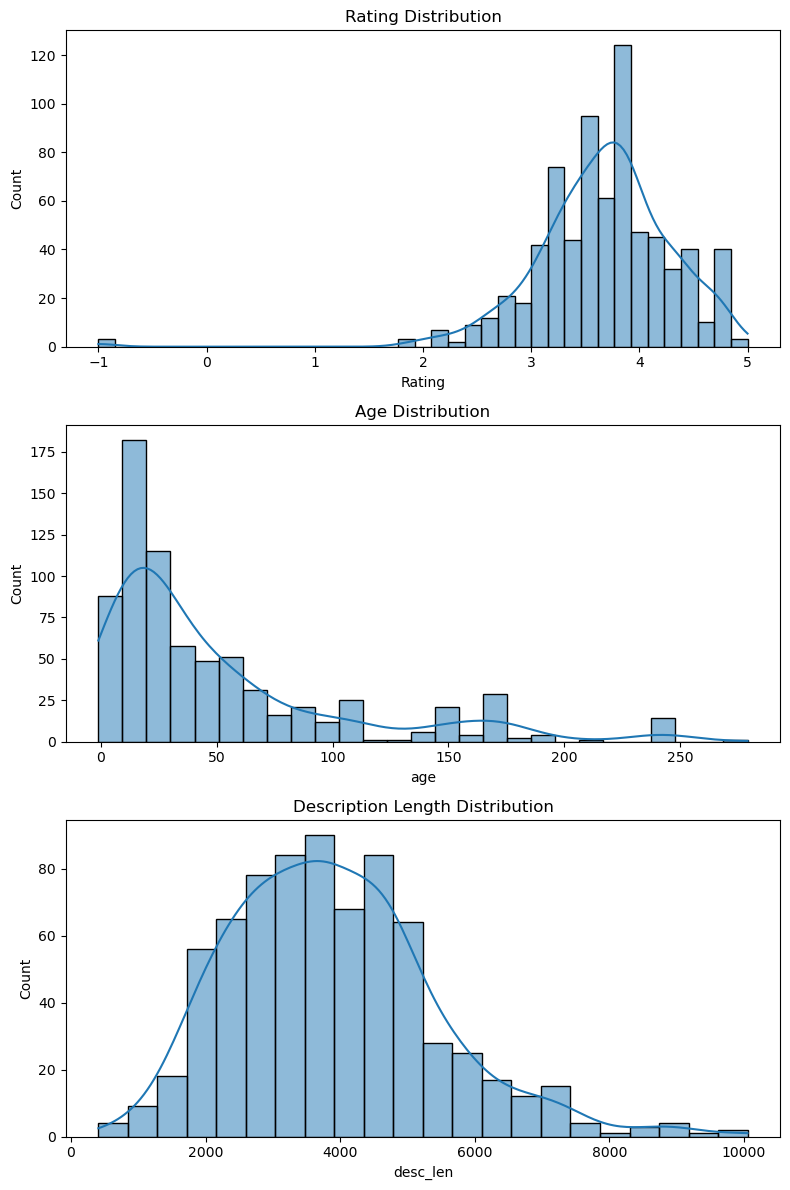

In [37]:
# Drawing some more histograms for other continuous variables

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))  

sns.histplot(df['Rating'], kde=True, ax=ax1)
ax1.set_title('Rating Distribution')

sns.histplot(df['age'], kde=True, ax=ax2)
ax2.set_title('Age Distribution')

sns.histplot(df['desc_len'], kde=True, ax=ax3)
ax3.set_title('Description Length Distribution')

plt.tight_layout()  

plt.show()

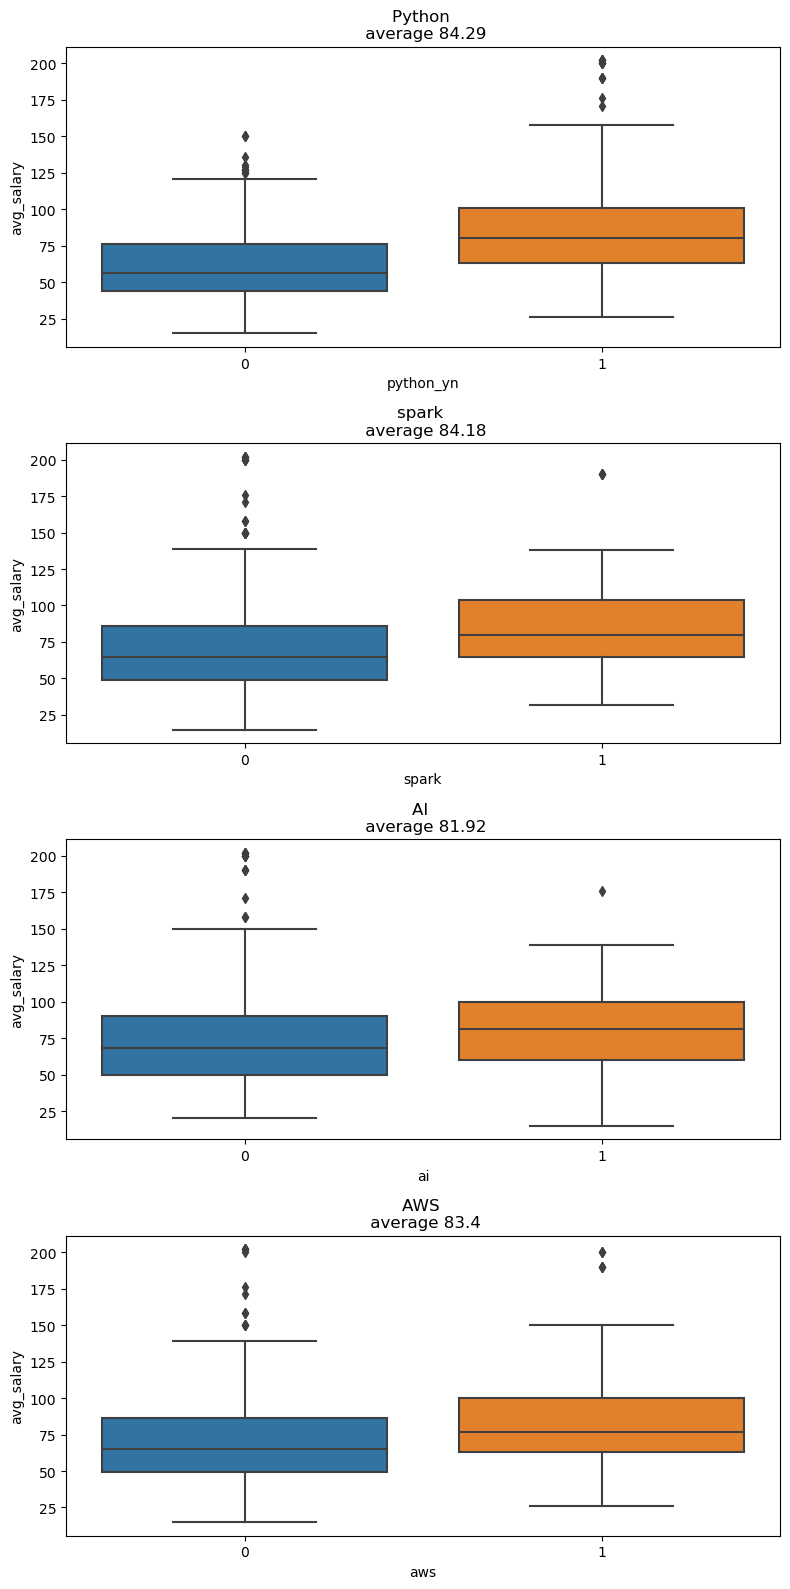

In [38]:
# Box plots to see if having the knowledge of certain software increase/decrease your chances of getting
# a higher salary
# R-studio not included as we only have 2 jobs in the whole dataset with the requirement of R-studio

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 16))

sns.boxplot(data=df, x='python_yn', y='avg_salary',ax=ax1)
ax1.set_title(f"Python \n average {round(df[df['python_yn']==1]['avg_salary'].mean(),2)}")
sns.boxplot(data=df, x='spark', y='avg_salary', ax=ax2)
ax2.set_title(f"spark \n average {round(df[df['spark']==1]['avg_salary'].mean(),2)}")
sns.boxplot(data=df, x='ai', y='avg_salary',ax=ax3)
ax3.set_title(f"AI \n average {round(df[df['ai']==1]['avg_salary'].mean(),2)}")
sns.boxplot(data=df, x='aws', y='avg_salary',ax=ax4)
ax4.set_title(f"AWS \n average {round(df[df['aws']==1]['avg_salary'].mean(),2)}")
plt.tight_layout()

- We notice that having the knowledge of these softwares will boost the chances of a higher salary.
- Clear frontrunner seems to be python where the average for not having python skills is somewhere between 50 and 60 whereas having the knowledge of python boosts the average upto 80/85.

Text(0.5, 1.0, 'Average job salary by job title')

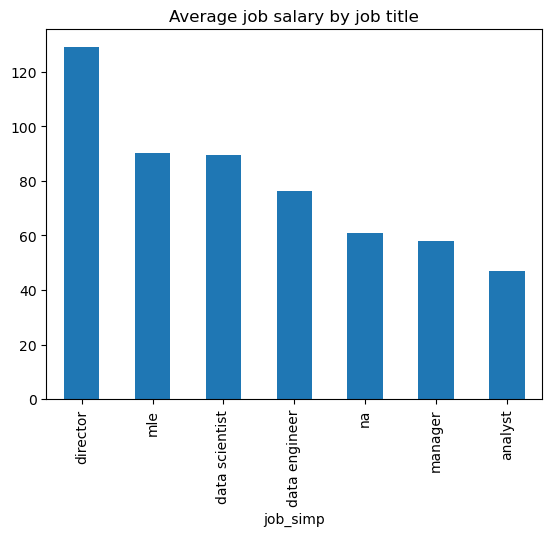

In [39]:
df.groupby('job_simp')['avg_salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average job salary by job title")

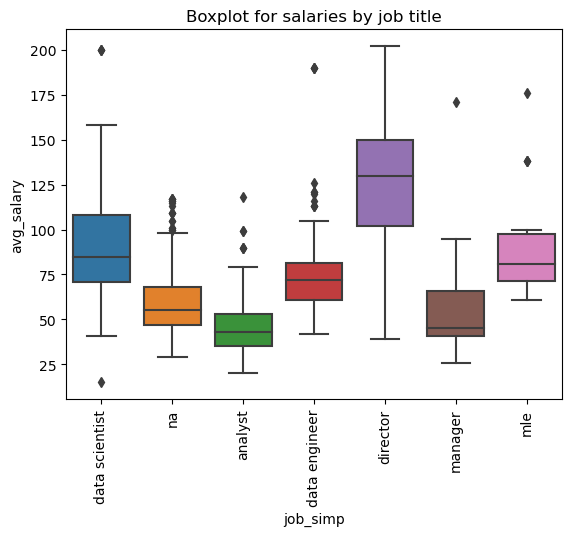

In [40]:
chart = sns.boxplot(data=df, x="job_simp", y='avg_salary', dodge=0.3)
plt.title("Boxplot for salaries by job title")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

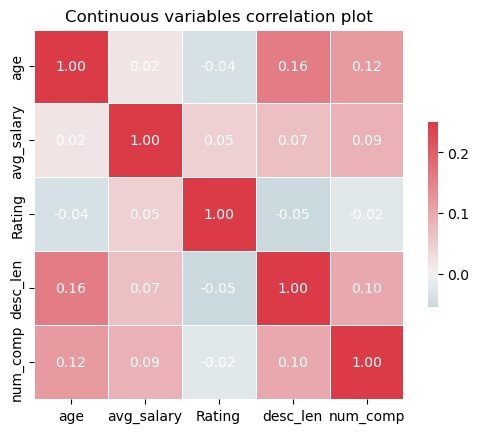

In [41]:
corr_df = df[['age','avg_salary','Rating','desc_len','num_comp']]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr_df.corr(), vmax=0.25, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Continuous variables correlation plot")

# Add annotations for correlation coefficients
for i in range(len(corr_df.columns)):
    for j in range(len(corr_df.columns)):
        text = f"{corr_df.corr().values[i, j]:.2f}"
        ax.text(j+0.5, i+0.5, text, ha='center', va='center', color='white')

plt.show()

In [42]:
# We can see slight correlations between age of company and number of competitors,
# age of company with description length and average salary with number of competitors
# but nothing that screams out to us. So we move on.

In [43]:
# Creating a df of only categorical columns for us to loop through
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'ai', 'job_simp', 'seniority']]

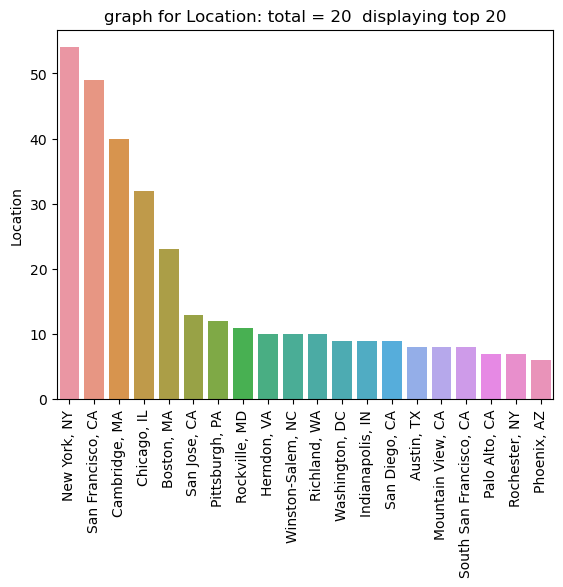

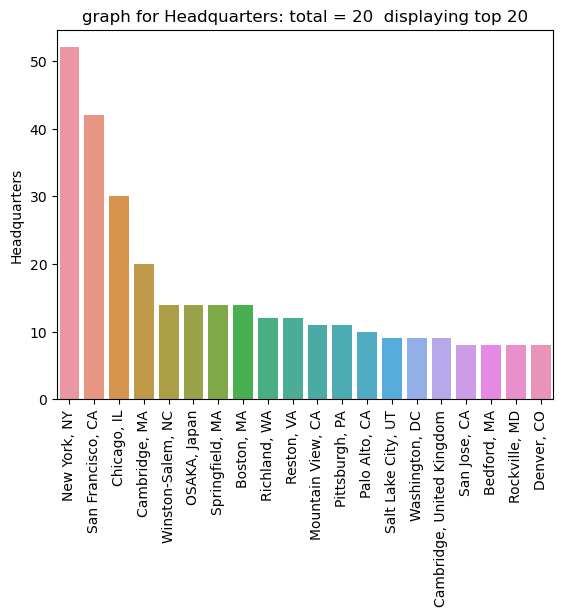

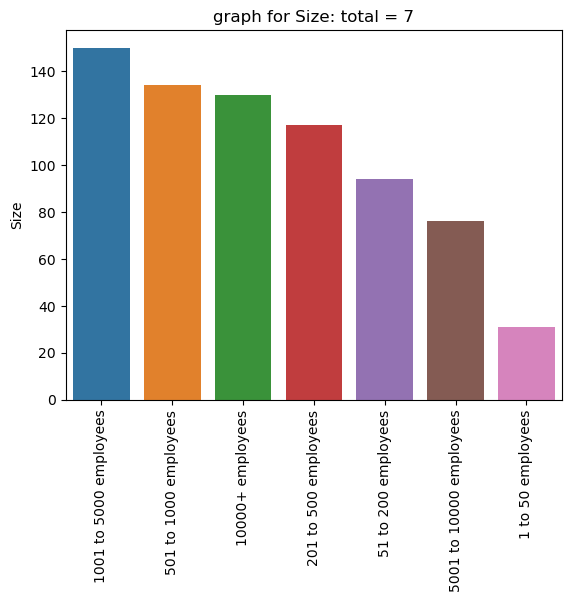

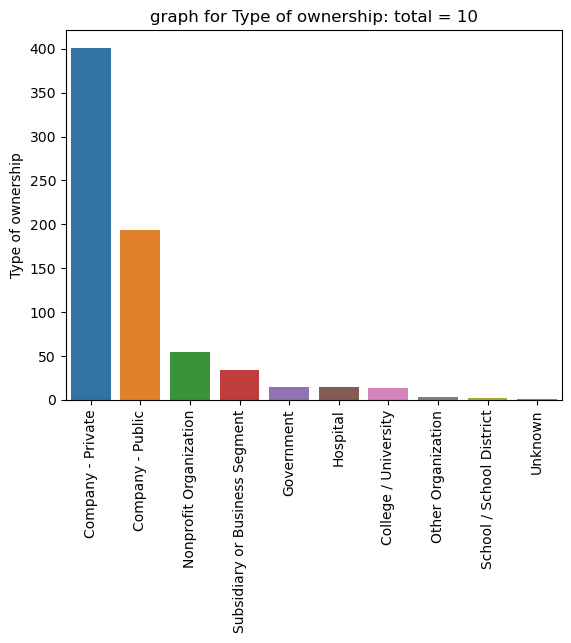

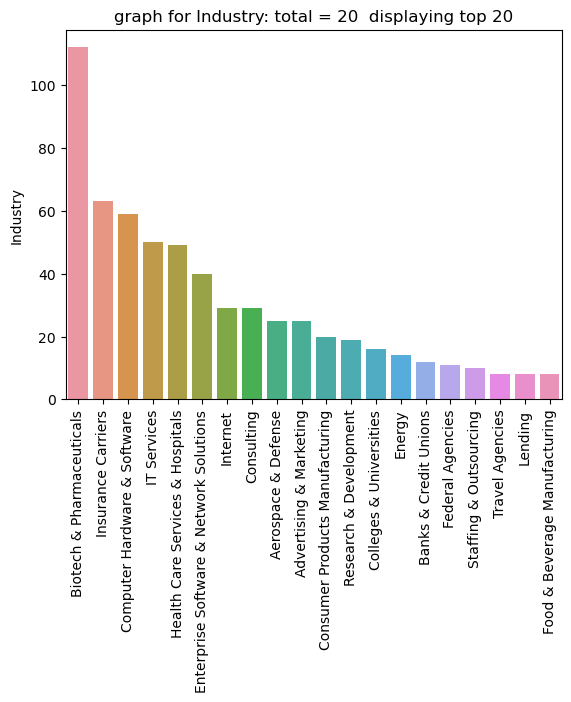

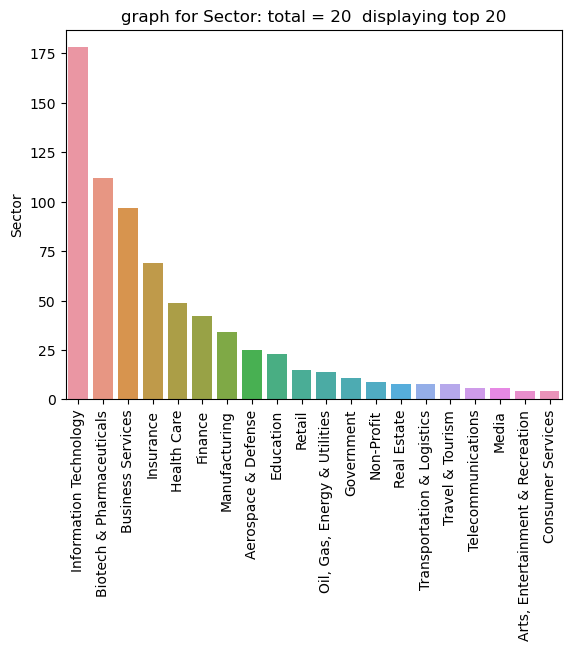

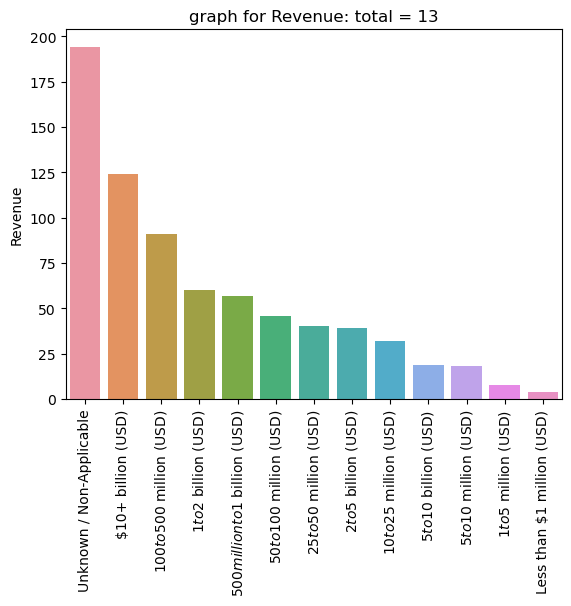

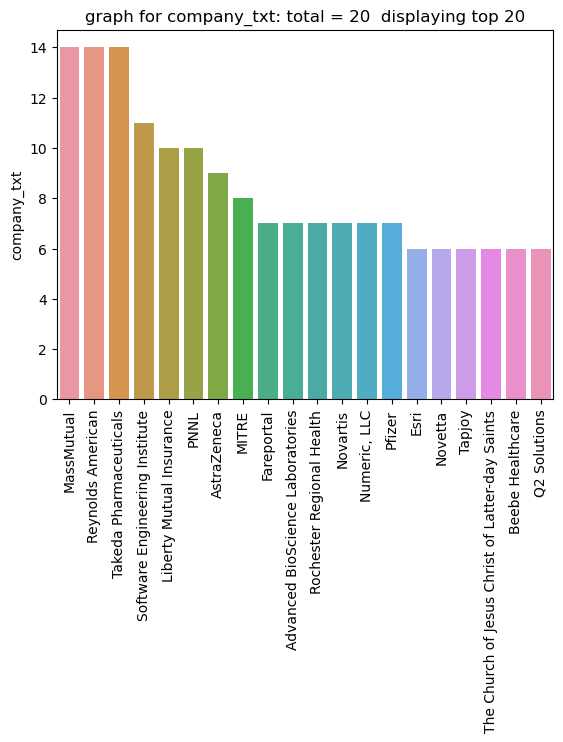

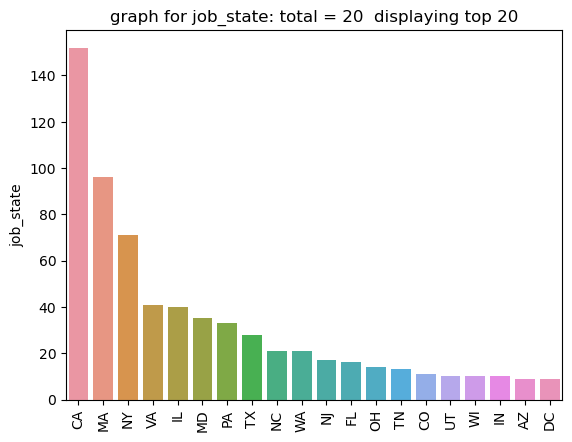

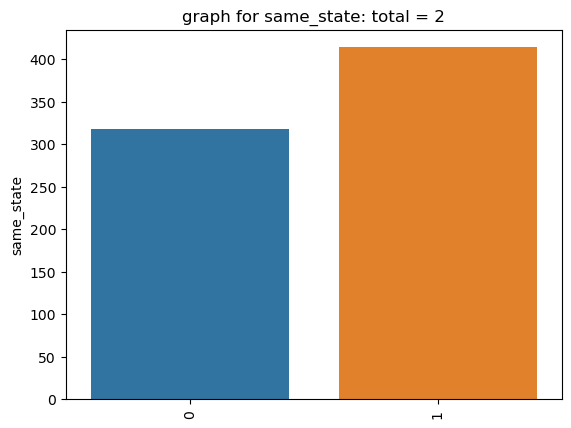

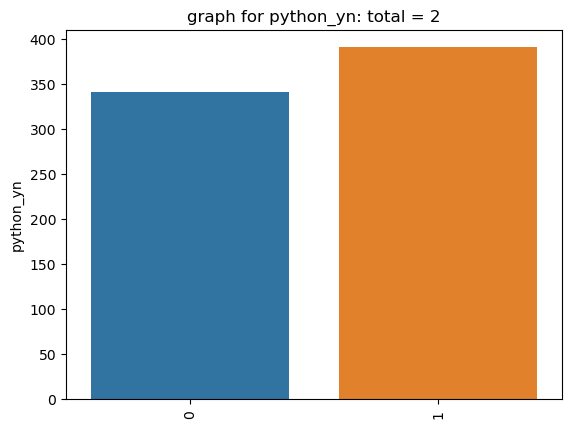

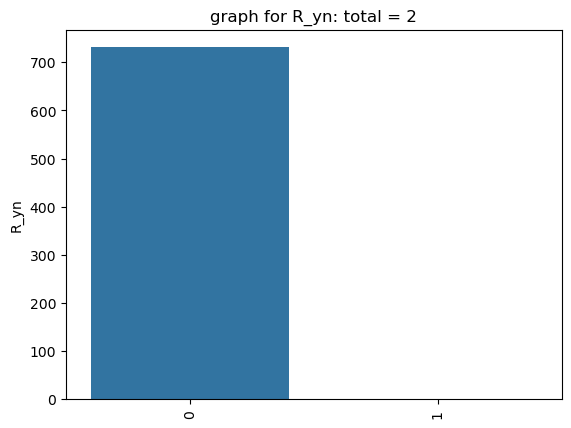

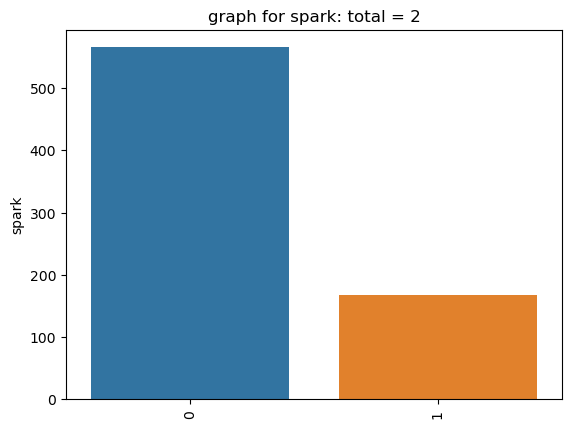

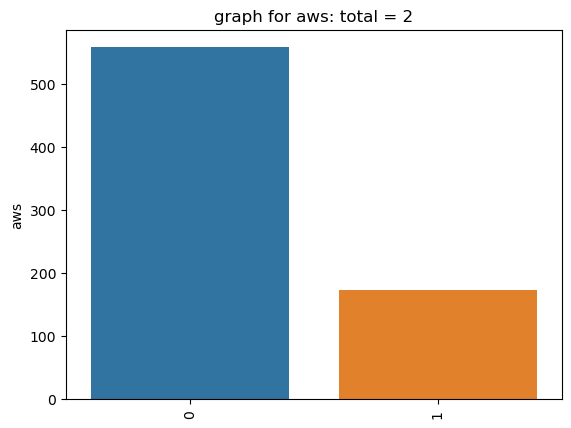

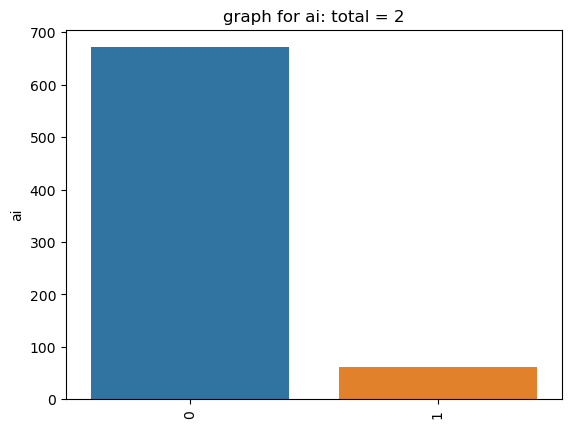

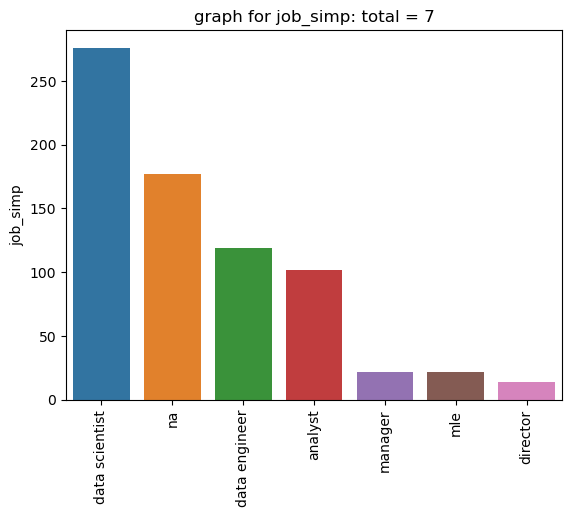

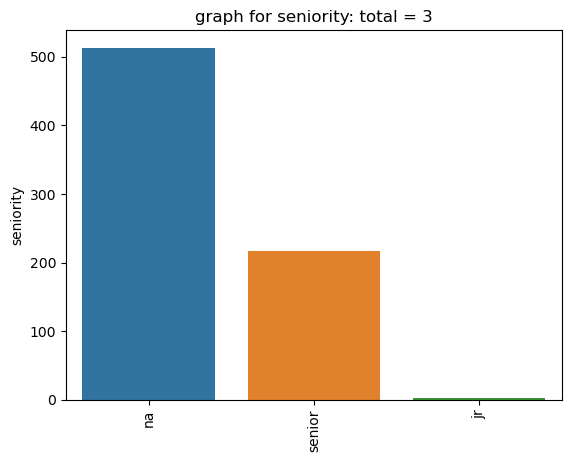

In [44]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    # If columns where there are too many categories, we only look at the top 20
    if len(cat_num)>20:
        cat_num = cat_num[:20]
        chart = sns.barplot(x=cat_num.index, y=cat_num)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        plt.title("graph for %s: total = %d  displaying top 20" % (i, len(cat_num)))
        plt.show()
    else:
        chart = sns.barplot(x=cat_num.index, y=cat_num)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        plt.title("graph for %s: total = %d" % (i, len(cat_num)))
        plt.show()

#### Some interesting points from the above visualisations
- California as a state has the highest number of data job openings.
- But if we look at the city level, New York is number 1.
- There's a clear bias that shows Private companies are offering lots of job in this field.
- Data Scientist is the the role that is advertised the most.
- If we are looking at sector, there seems to be lots of opportunities in IT followed  by Biotech & Pharma, and then business services.
- More than half the advertised jobs require the applicant to have the knowledge of Python.

In [45]:
# Pivot table looking at salaries by role by state
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary').sort_values('avg_salary', ascending=False)

,,avg_salary
job_state,job_simp,
IL,director,174.166667
CA,mle,134.000000
NJ,director,124.000000
DC,data scientist,116.000000
CA,data scientist,109.985294
UT,data scientist,108.000000
IL,mle,100.000000
MO,data scientist,97.666667
CA,data engineer,97.160000


Interesting to see that Machine Learning engineers in California are earning more than directors in some other US states on average

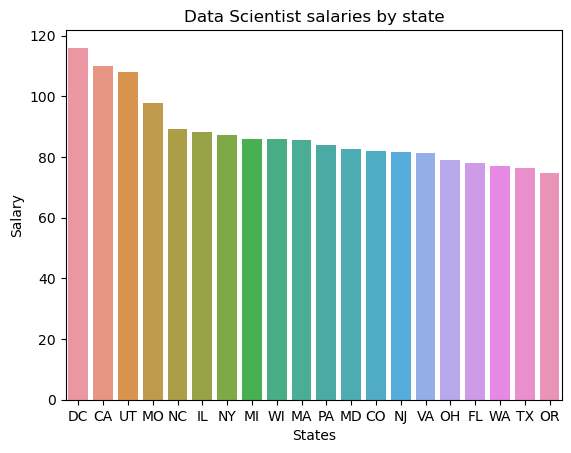

In [46]:
# Data Scientist salaries by state
x = pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)
x = x[:20]
sns.barplot(x=x.index, y='avg_salary', data=x, dodge=0.2)
plt.xlabel('States')
plt.ylabel('Salary')
plt.title('Data Scientist salaries by state')

plt.show()  # Display the plot

DC seems like the best location for Data Scientists followed by California

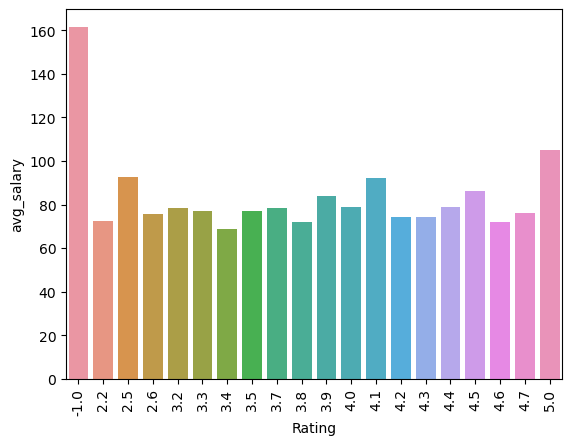

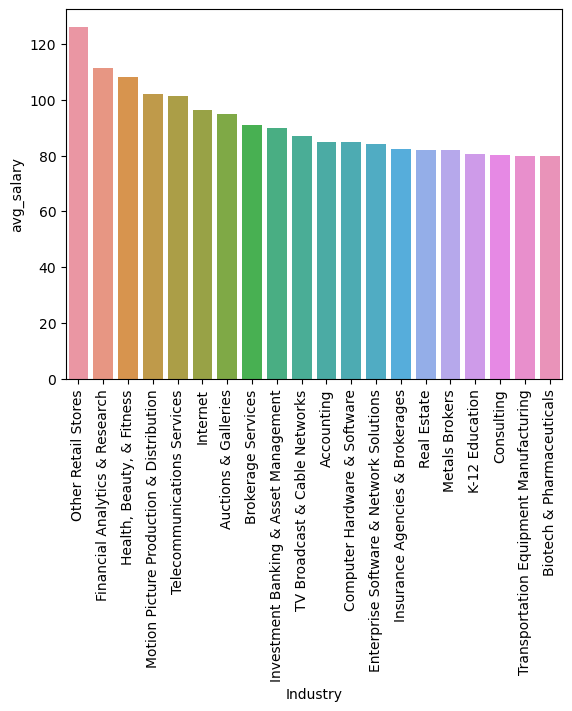

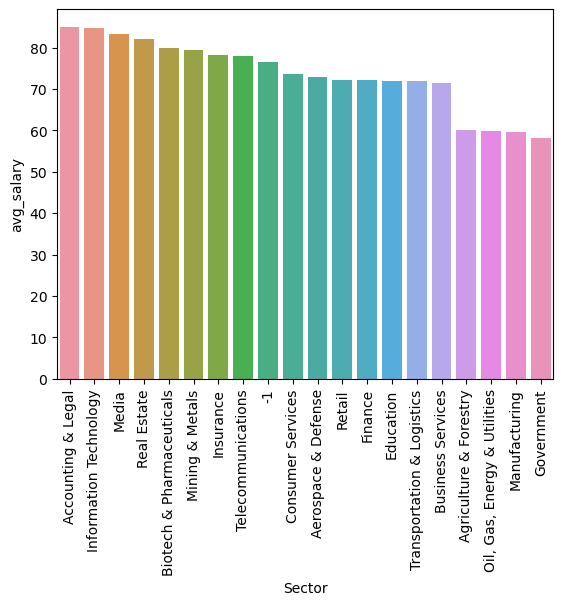

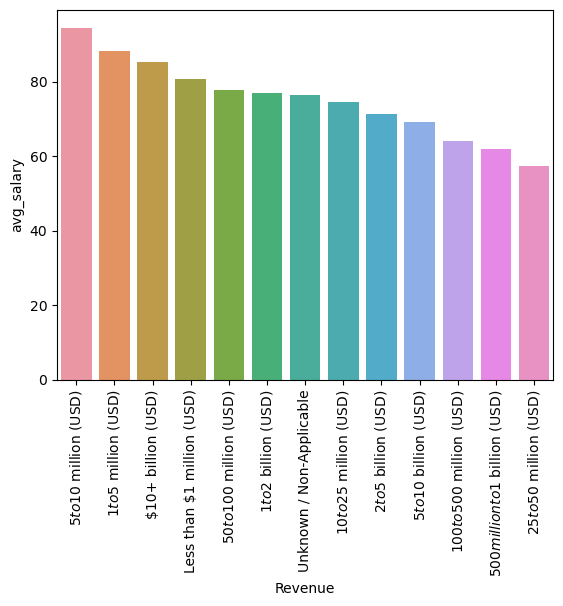

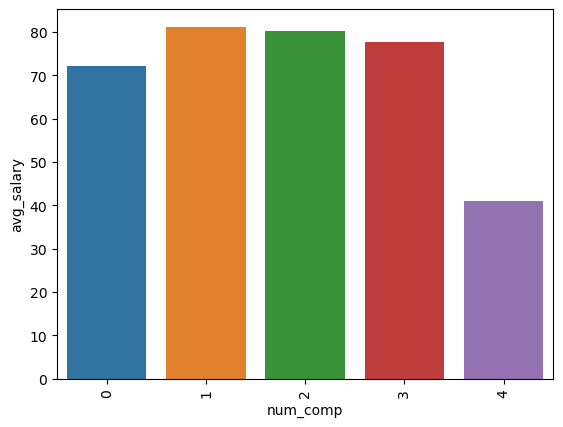

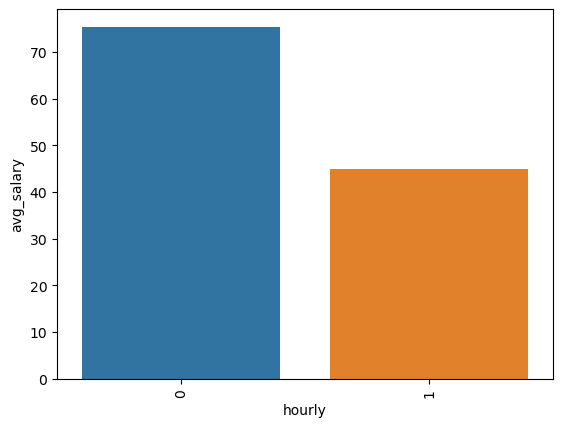

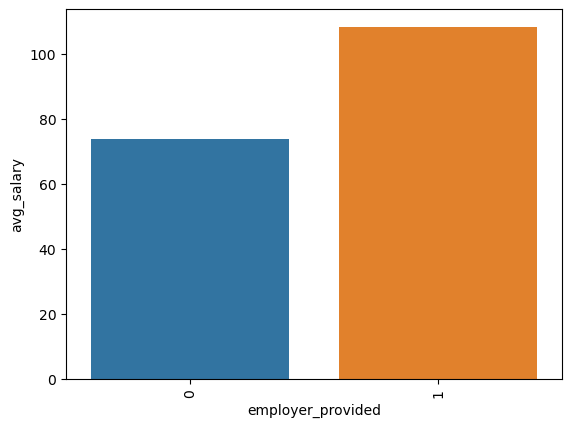

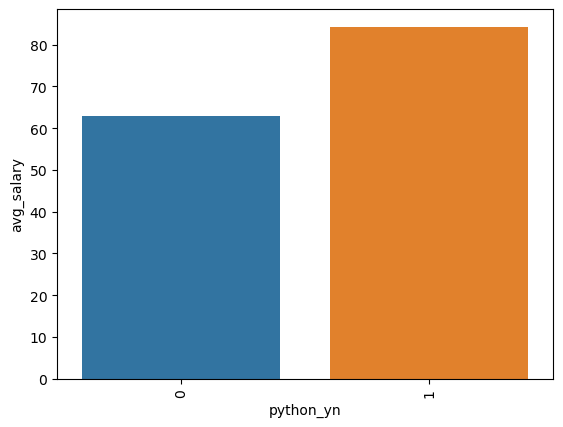

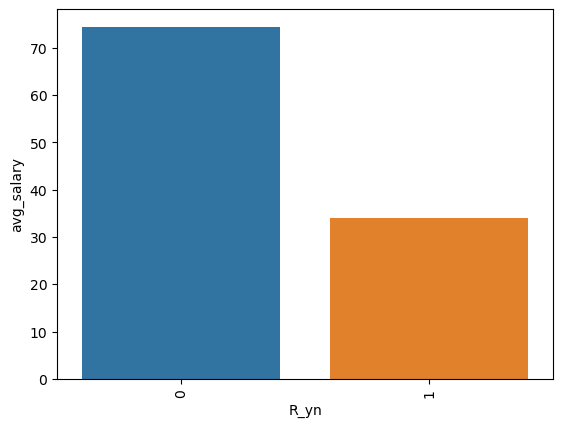

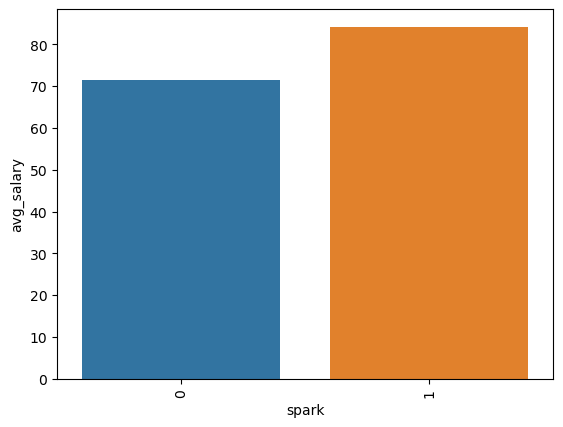

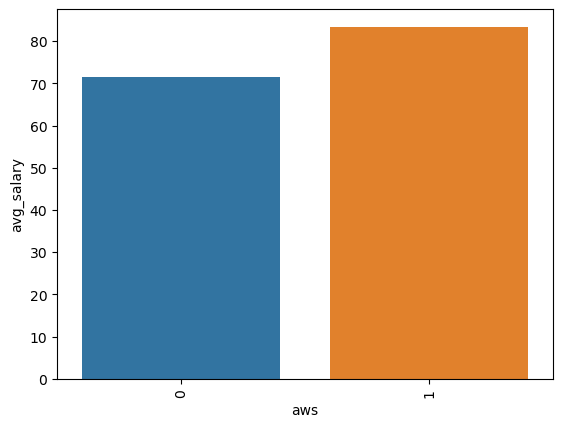

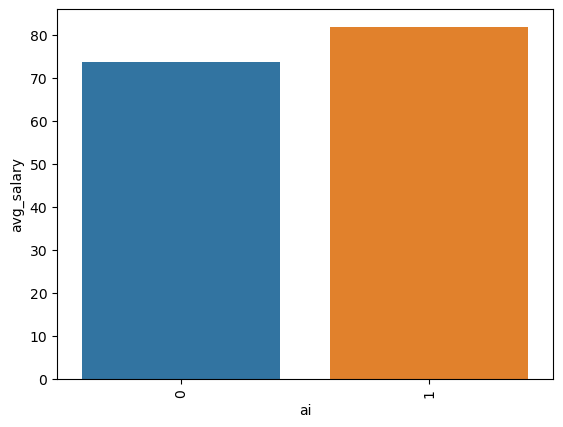

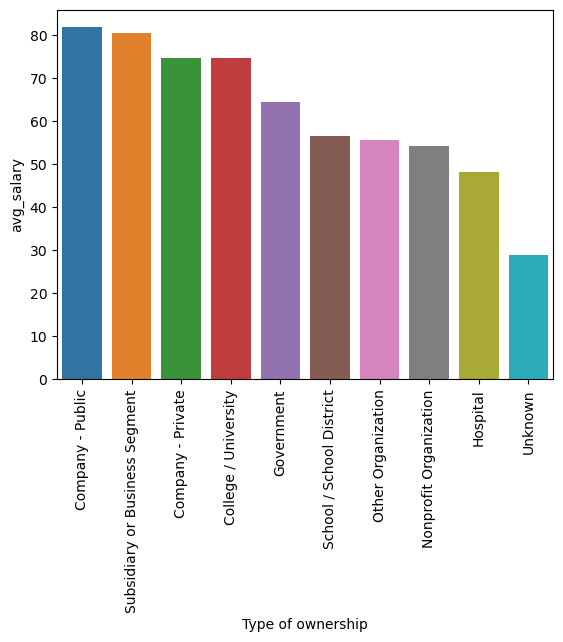

Error in processing 'avg_salary': Grouper for 'avg_salary' not 1-dimensional


In [48]:
# Now, we'll look at how these categorical variables relate to the average salary

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'ai', 'Type of ownership', 'avg_salary']]
for i in df_pivots.columns:
    try:
        x = pd.DataFrame(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))
        if len(x) > 20:
            x = x.iloc[:20]
        chart = sns.barplot(x=x.index, y='avg_salary', data=x, dodge=0.2)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        plt.show()
    except ValueError as e:
        print(f"Error in processing '{i}': {e}")


### Insights
- Public companies pay the highest salaries
- Python users on average get paid considerably more than non-Python users
- Permanent employees on average earn nearly twice as much as employees who are working on a per hour basis.
- Highest average salaries are being paid by low to mid tier companies (in terms of Revenue generated)

## We will now create a word cloud to look at key words used in the job description

In [49]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')

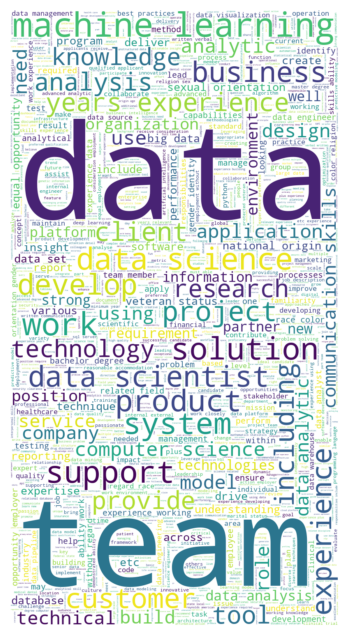

In [180]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


## Building a model

In [50]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'ai', 'company size', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [73]:
# Selecting the columns for our model

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','ai','job_simp','seniority','desc_len']]


In [74]:
# Getting dummy columns for the categorical values in our df

df_dum = pd.get_dummies(df_model)
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,ai,desc_len,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_U

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Using sklearn's StandardScaler to scale the continuous values in our dataframe before modelling

# Initializing the StandardScaler
scaler = StandardScaler()

sub_cols = ['Rating','num_comp','age','desc_len']
df_dum[sub_cols] = StandardScaler().fit_transform(df_dum[sub_cols])


df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,ai,desc_len,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_U

In [87]:
print(len(df_dum))

732


In [88]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [89]:
# Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Models
Since we are trying to predict a continuous value (estimated salary), we will look at 3 different Linear Regression models. LinearRegression, Lasso and RandomForestRegressor. 

We will be using the mean absolute error to judge the performance of our models. 

In [106]:
# Using sklearn's linear model
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_mae = np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print(lm_mae)

-341126643461.89307


In [107]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
lasso_mae = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print(lasso_mae)

-15.885303145343578


In Lasso regression we have the option to tune the alpha value in hopes of improving our performance.
Therefore we will create a loop to see what value of alpha gives us the best results

In [108]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

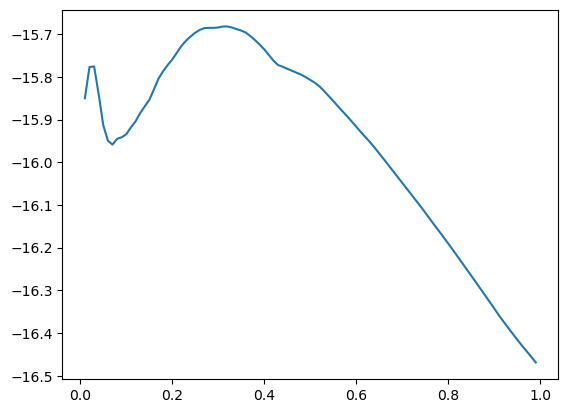

In [109]:
plt.plot(alpha,error)

In [110]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]
# Best value for alpha for the least error

,alpha,error
31,0.32,-15.682222


In [111]:
# Using the best alpha value
lm_l = Lasso(alpha=0.32)
lm_l.fit(X_train,y_train)
lasso_mae = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
print(lasso_mae)

-15.682221896161323


In [113]:
# Our Final Regression model

# RandomForestRegressor
rf = RandomForestRegressor()

rf_mae = np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))
print(rf_mae)

-11.893897435897435


## Modelling notes
- Linear Regression seems to be way off in terms of its prediction capability.
- Lasso and RandomForest have given us much better results, especially RandomForest.
- This makes sense because our dataframe contained lots of columns with binary values. Usually this kind of a dataset suits the RandomForest model the best.
- To see if we can improve our RandomForest performance we will tune it with the help of GridSearchCV

In [114]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=150)

In [115]:
gs.best_score_


-11.814039886039884

In [125]:
print("RandomForestRegressor pre tuning:",rf_mae)
print("RandomForestRegressor post tuning:",gs.best_score_)

# print("% increase in performance",(rf_mae - gs.best_score_ )*100/rf_mae)

print("\nWe see a 0.6% increase in training performance after optimizing our model")

RandomForestRegressor pre tuning: -11.893897435897435
RandomForestRegressor post tuning: -11.814039886039884

We see a 0.6% increase in training performance after optimizing our model


In [127]:
# Testing the models on our test sets

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

# The mean absolute error for the Linear Regression seems to be really out of pocket, but our best model
# RandomForestRegressor has performed very well with a mae of just 9.43

43010874318.89034
17.118692152994523
10.064013605442176


## Model results
- RandomForestRegressor had the best performance on the training dataset and it seems to have generalized well. Giving us an even better performance on the testing dataset with mean absolute error of 10.06. A very respectable number when we compare it to the estimated salary ranges in our original dataset.
- Lasso performed okay, similar to the training results. Its MAE on the testing data was 17.11.
- As for Linear Regression, it failed as a model. Giving us unreasonably high training and testing MAE. We can not consider it at all.

Finally we'll test the model on a random individual example

In [154]:
random_row = df_dum.sample(n=1)

In [155]:
random_row

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,ai,desc_len,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_U

In [156]:
# The average salary for this random sample is 64k. The data is already standardized and pre-process 
# as we plucked it out from our own dataset

In [177]:
random_row_X = random_row.drop('avg_salary', axis=1)
random_predict = gs.best_estimator_.predict(random_row_X)
print("Prediction: ", random_predict)
print("\nActual: ", random_row['avg_salary'])

Prediction:  [55.34]

Actual:  853    55.0
Name: avg_salary, dtype: float64


When running the model on random rows plucked out from the dataset, we can see that it produces pretty accurate results.

# Conclusion

### Key Insights from EDA
- Python is as key programming software for a person looking to work in the field of Data Science or any other data related roles.
- People with Python and Machine Learning skills stand a good chance of earning an above average to a every good salary.
- California, DC and New York came out as the best locations overall taking into account the number of openings and the estimated salary.
- Low to low-mid tier companies seem to be hiring a high number of people in data related jobs whereas the public companies are the ones giving out the highest salaries

### Modelling Performance
- Linear Regression: Extremely poor performance
- Lasso: 15.68 MAE (Decent)
- Random Forest: 10.06 MAE (Good)

## Extras

In [205]:
# Creating a visually appealing image for our github readme

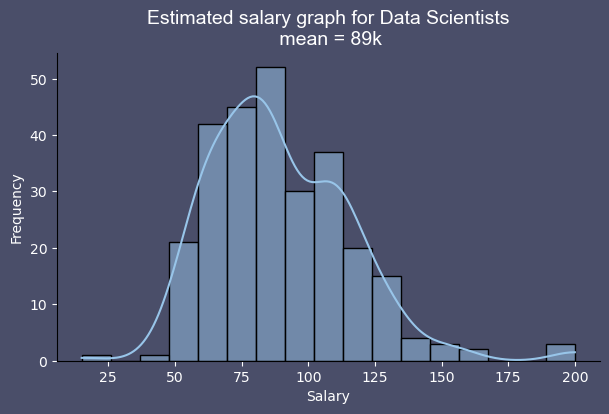

In [206]:
fig, ax = plt.subplots(figsize=(7, 4))
fig.set_facecolor("#4A4E69")
ax.set_facecolor('#4A4E69')

plot = sns.histplot(df[df['job_simp'] == "data scientist"]['avg_salary'], kde=True, color='#98C5E9')  # Light blue

title_font = {'fontname': 'Arial', 'color': 'white', 'size': 14}
plt.title(f'Estimated salary graph for Data Scientists\n mean = {round(df[df["job_simp"]=="data scientist"]["avg_salary"].mean())}k', **title_font)

ax.set_xlabel("Salary", color='white')
ax.set_ylabel("Frequency", color='white')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
